In [16]:
!pip install xgboost
!pip install tensorflow

  Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl (223.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 139.9 MB/s eta 0:00:0000:0100:01
  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve



**This notebook aims to predict newspaper subscription churn using machine learning techniques. It explores feature engineering, data preprocessing, and model selection to build an optimal predictive model.**

# Step 1: Load and Inspect Data

In [40]:
# Load dataset
file_path = 'NewspaperChurn new version.xlsx'
df = pd.read_excel(file_path)

# Preview the first few rows
df.head()


,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
0,180590686,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,1 3RD PL UNIT 703,CA,LONG BEACH,LOS ANGELES,90802,$7.00 - $7.99,7Day,FM,0,CircAdm,NO
1,181401653,"$500,000 Plus",OWNER,unknown,Y,14,50-54,NaN,1 AVIGNON,CA,NEWPORT COAST,ORANGE,92657,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
2,180374685,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,1 BLACKSWAN,CA,IRVINE,ORANGE,92604,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
3,180703483,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,1 BLUE HORIZON,CA,LAGUNA NIGUEL,ORANGE,92677,$1.00 - $1.99,SunOnly,MW,1,Internet,NO
4,180358906,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,1 BRISA DEL LAGO,CA,RANCHO SANTA MARGARITA,ORANGE,92688,$8.00 - $8.99,Thu-Sun,MM,0,Crew,YES


In [41]:
# Understanding dataset size and existing columns

print(f"Dataset shape: {df.shape}")
print("\nColumn Names:")
print(df.columns.tolist())


Dataset shape: (15855, 19)

Column Names:
['SubscriptionID', 'HH Income', 'Home Ownership', 'Ethnicity', 'dummy for Children', 'Year Of Residence', 'Age range', 'Language', 'Address', 'State', 'City', 'County', 'Zip Code', 'weekly fee', 'Deliveryperiod', 'Nielsen Prizm', 'reward program', 'Source Channel', 'Subscriber']


In [42]:
# Checking existing columns 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15747 non-null  object
 7   Language            14848 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15669 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15726 non-null  object
 16  reward program      15

# Step 2: Checking Missing Values

In [43]:
# Checking missing values

df.isnull().sum().to_frame(name="Missing Values")


,Missing Values
SubscriptionID,0
HH Income,0
Home Ownership,0
Ethnicity,0
dummy for Children,0
Year Of Residence,0
Age range,108
Language,1007
Address,0
State,0


Columns with missing values:
Language         1007
weekly fee        186
Nielsen Prizm     129
Age range         108
dtype: int64


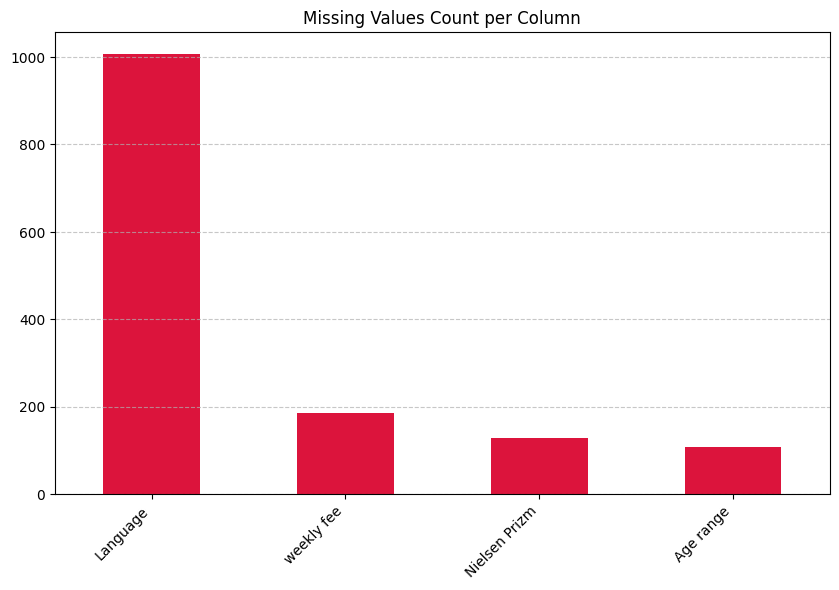

In [44]:
# Step 2.1 - Check Missing Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Columns with missing values:")
print(missing_values)

# Visualize

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='crimson')
plt.title("Missing Values Count per Column")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
# Imbalance check
df['Subscriber'].value_counts(normalize=True)  

Subscriber
NO     0.808452
YES    0.191548
Name: proportion, dtype: float64

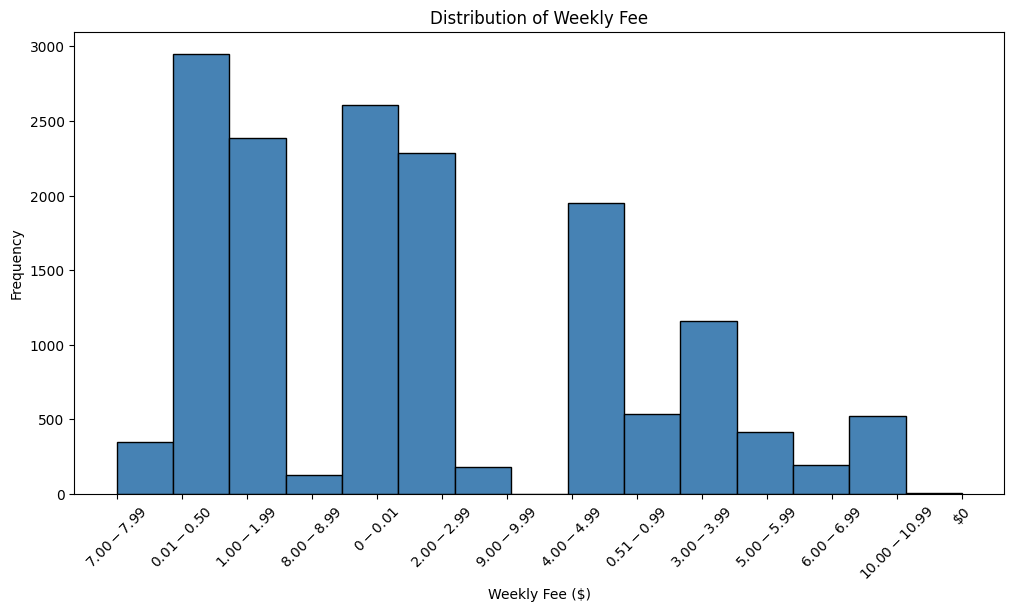

In [45]:
# Distribution check

plt.figure(figsize=(12,6))
df['weekly fee'].hist(bins=15, color='steelblue', edgecolor='black')
plt.title('Distribution of Weekly Fee')
plt.xlabel('Weekly Fee ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()




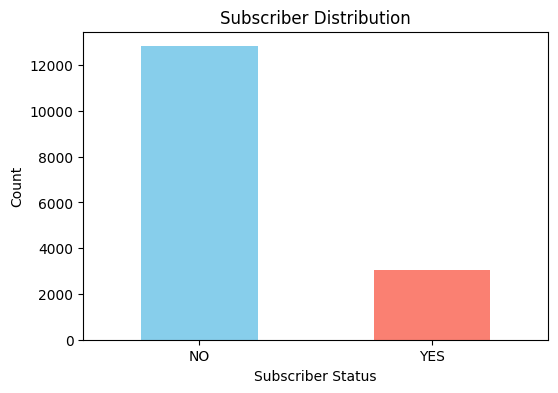

In [46]:
plt.figure(figsize=(6,4))
df['Subscriber'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Subscriber Distribution')
plt.ylabel('Count')
plt.xlabel('Subscriber Status')
plt.xticks(rotation=0)
plt.show()


**Dropping columns**

In [47]:
df = df.drop('SubscriptionID', axis=1)
X = df.drop("Subscriber", axis=1)
y = df["Subscriber"]


# Step 3: Train-Test Split

**Stratified sampling is used, which is appropriate given the imbalance.**


In [48]:
# Split into train and test (DO THIS BEFORE ENCODING/MISSING VALUES)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [49]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


# Step 4: Handling Missing Values

In [50]:
# Function to convert weekly fee ranges into numeric midpoints
def convert_fee_range(fee_range):
    if pd.isnull(fee_range):
        return np.nan
    if isinstance(fee_range, str) and '-' in fee_range:
        low, high = fee_range.replace('$', '').split('-')
        return (float(low) + float(high)) / 2
    return float(fee_range.replace('$', '')) if isinstance(fee_range, str) else fee_range

# Now apply it to the training set first
X_train['weekly fee'] = X_train['weekly fee'].apply(convert_fee_range)

# Get median from training data only
weekly_fee_median = X_train['weekly fee'].median()

# Fill missing in train with median
X_train['weekly fee'].fillna(weekly_fee_median, inplace=True)

# Apply same transformation to test set
X_test['weekly fee'] = X_test['weekly fee'].apply(convert_fee_range)
X_test['weekly fee'].fillna(weekly_fee_median, inplace=True)


/tmp/ipykernel_402/3917046060.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['weekly fee'].fillna(weekly_fee_median, inplace=True)
/tmp/ipykernel_402/3917046060.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [51]:
# Fill missing values - Apply to TRAIN first, then TEST using train's strategy

# Language - fill with mode from train set
lang_mode = X_train['Language'].mode()[0]
X_train['Language'] = X_train['Language'].fillna(lang_mode)
X_test['Language'] = X_test['Language'].fillna(lang_mode)

# Nielsen Prizm - fill with mode from train set
prizm_mode = X_train['Nielsen Prizm'].mode()[0]
X_train['Nielsen Prizm'] = X_train['Nielsen Prizm'].fillna(prizm_mode)
X_test['Nielsen Prizm'] = X_test['Nielsen Prizm'].fillna(prizm_mode)

# Age Range - fill with mode from train set
age_mode = X_train['Age range'].mode()[0]
X_train['Age range'] = X_train['Age range'].fillna(age_mode)
X_test['Age range'] = X_test['Age range'].fillna(age_mode)

# Confirm missing values (optional check)
print("Missing values in train set after cleaning:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

print("\nMissing values in test set after cleaning:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])




Missing values in train set after cleaning:
Series([], dtype: int64)

Missing values in test set after cleaning:
Series([], dtype: int64)


In [52]:
# Fill missing values with mode for categorical columns (since these are categorical)
for col in ['Ethnicity', 'Language', 'Source Channel']:
    mode_value = X_train[col].mode()[0]  # Always use train mode to avoid data leakage
    X_train[col] = X_train[col].fillna(mode_value)
    X_test[col] = X_test[col].fillna(mode_value)


**Filled:**

weekly fee using *median*.

Language, Nielsen Prizm, Age range, Ethnicity, Source Channel using *mode* (from train only).

In [53]:
X_train['HH Income'] = X_train['HH Income'].str.strip()
X_train['HH Income'] = X_train['HH Income'].str.replace(r'^\$\s*', '$', regex=True)
X_train['HH Income'] = X_train['HH Income'].str.replace(r'\s*-\s*', '-', regex=True)
X_train['HH Income'] = X_train['HH Income'].str.replace(r'\s*Plus', '-Plus', regex=True)


In [54]:
X_test['HH Income'] = X_test['HH Income'].str.strip()
X_test['HH Income'] = X_test['HH Income'].str.replace(r'^\$\s*', '$', regex=True)
X_test['HH Income'] = X_test['HH Income'].str.replace(r'\s*-\s*', '-', regex=True)
X_test['HH Income'] = X_test['HH Income'].str.replace(r'\s*Plus', '-Plus', regex=True)


In [55]:
print("Train HH Income unique values after cleaning:")
print(X_train['HH Income'].unique())


Train HH Income unique values after cleaning:
['$40,000-$49,999' '$100,000-$124,999' '$125,000-$149,999'
 '$50,000-$59,999' '$500,000-Plus' '$20,000-$29,999' '$60,000-$69,999'
 '$175,000-$199,999' '$150,000-$174,999' '$30,000-$39,999'
 '$90,000-$99,999' '$200,000-$249,999' '$300,000-$399,999' 'Under $20,000'
 '$400,000-$499,999' '$70,000-$79,999' '$80,000-$89,999'
 '$250,000-$299,999']


In [56]:
print("Test HH Income unique values after cleaning:")
print(X_test['HH Income'].unique())


Test HH Income unique values after cleaning:
['$400,000-$499,999' '$40,000-$49,999' '$500,000-Plus' '$70,000-$79,999'
 '$80,000-$89,999' 'Under $20,000' '$175,000-$199,999' '$100,000-$124,999'
 '$60,000-$69,999' '$200,000-$249,999' '$125,000-$149,999'
 '$50,000-$59,999' '$30,000-$39,999' '$150,000-$174,999'
 '$300,000-$399,999' '$20,000-$29,999' '$90,000-$99,999'
 '$250,000-$299,999']


# Step 5: Encoding

**Actions:**

**Binary encoding:** Home Ownership, dummy for Children.

**Ordinal encoding:** HH Income, Age range.

**One-hot encoding:** County, Nielsen Prizm.

**Frequency encoding:** City, Language, Source Channel, Deliveryperiod, Ethnicity

**(a) Binary Encoding**

In [57]:
binary_map_home = {'OWNER': 1, 'RENTER': 0}
binary_map_children = {'Y': 1, 'N': 0}

X_train['Home Ownership'] = X_train['Home Ownership'].map(binary_map_home)
X_test['Home Ownership'] = X_test['Home Ownership'].map(binary_map_home)

X_train['dummy for Children'] = X_train['dummy for Children'].map(binary_map_children)
X_test['dummy for Children'] = X_test['dummy for Children'].map(binary_map_children)


**(b) Ordinal Encoding**

In [58]:
ordinal_columns = {
    'HH Income': [
        'Under $20,000', '$20,000-$29,999', '$30,000-$39,999', '$40,000-$49,999',
        '$50,000-$59,999', '$60,000-$69,999', '$70,000-$79,999', '$80,000-$89,999',
        '$90,000-$99,999', '$100,000-$124,999', '$125,000-$149,999', '$150,000-$174,999',
        '$175,000-$199,999', '$200,000-$249,999', '$250,000-$299,999', '$300,000-$399,999',
        '$400,000-$499,999', '$500,000-Plus'
    ],
    'Age range': [
        '24 years or less', '25-29', '30-34', '35-39',
        '40-44', '45-49', '50-54', '55-59',
        '60-64', '65-69', '70-74', '75 years or more'
    ]
}

ordinal_encoder = OrdinalEncoder(categories=list(ordinal_columns.values()))

# Fit on train, transform train and test
X_train[list(ordinal_columns.keys())] = ordinal_encoder.fit_transform(X_train[list(ordinal_columns.keys())])
X_test[list(ordinal_columns.keys())] = ordinal_encoder.transform(X_test[list(ordinal_columns.keys())])

# Optional: Ensure integer type if needed
X_train[list(ordinal_columns.keys())] = X_train[list(ordinal_columns.keys())].astype(int)
X_test[list(ordinal_columns.keys())] = X_test[list(ordinal_columns.keys())].astype(int)



**(c) One-Hot Encoding**

In [59]:
X_train = pd.get_dummies(
    X_train,
    columns=['County', 'Nielsen Prizm'],
    drop_first=True
)

# Make sure `X_test` has exactly the same columns
X_test = pd.get_dummies(
    X_test,
    columns=['County', 'Nielsen Prizm'],
    drop_first=True
)

# Handle any column mismatch (sometimes test set may miss a category)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


**(d) Frequency Encoding**

In [26]:
high_cardinality_columns = ['City', 'Language', 'Source Channel', 'Deliveryperiod', 'Ethnicity']

for col in high_cardinality_columns:
    # Learn mapping from train only
    freq_map = X_train[col].value_counts(normalize=True).to_dict()
    
    # Apply mapping to both train and test
    X_train[col] = X_train[col].map(freq_map)
    X_test[col] = X_test[col].map(freq_map)


In [60]:
print(X_train.head())
print(X_test.head())


       HH Income  Home Ownership          Ethnicity  dummy for Children  \
1056           3               1           Egyptian                   0   
9694           9               0            English                   0   
14569         10               1             Indian                   0   
10143          9               1            Chinese                   0   
4374           4               0  Scottish (Scotch)                   0   

       Year Of Residence  Age range Language                     Address  \
1056                   7         10  English             1134 MISSION DR   
9694                   1          1  English      3100 PARK AVE APT 2203   
14569                 23          9    Hindi        814 E BASTANCHURY RD   
10143                  1          3  Chinese                   33 HUNTER   
4374                   1          1  English  17171 BOLSA CHICA ST APT 4   

      State              City  ...  County_RIVERSIDE  County_SAN BERNARDINO  \
1056     CA  

# Step 6: Exploratory Analysis (EDA) #

**Actions:**

Target balance check (imbalance confirmed).

Checked numerical/categorical distributions.

Correlation matrix heatmap.

Train shape: (12684, 26), Test shape: (3171, 26)
HH Income                0
Home Ownership           0
Ethnicity                0
dummy for Children       0
Year Of Residence        0
Age range                0
Language                 0
Address                  0
State                    0
City                     0
Zip Code                 0
weekly fee               0
Deliveryperiod           0
reward program           0
Source Channel           0
County_ORANGE            0
County_RIVERSIDE         0
County_SAN BERNARDINO    0
Nielsen Prizm_FM         0
Nielsen Prizm_FW         0
Nielsen Prizm_ME         0
Nielsen Prizm_MM         0
Nielsen Prizm_MW         0
Nielsen Prizm_YE         0
Nielsen Prizm_YM         0
Nielsen Prizm_YW         0
dtype: int64


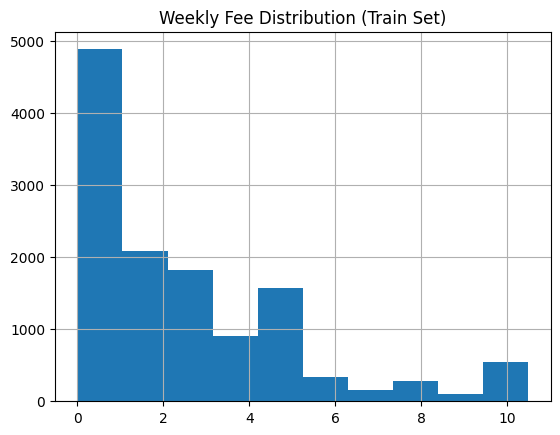

Language
English              9577
Spanish              2123
Vietnamese            337
Chinese               123
Korean                 88
Portuguese             76
Hindi                  68
Arabic                 52
Italian                44
Japanese               39
Farsi (Persian)        35
German                 21
Hebrew                 13
Romanian               11
Polish                  9
French                  9
Armenian                7
Russian                 7
Tagalog                 6
Danish                  4
Hungarian               4
Dutch                   4
Amharic                 3
Swedish                 3
Khmer (Cambodian)       3
Slovenian               2
Latvian (Lettish)       2
Greek                   2
Thai                    2
Laotian (Lao)           2
Urdu                    2
Norwegian               2
Turkish                 1
Ga                      1
Finnish                 1
Czech                   1
Name: count, dtype: int64
HH Income
0     1556
9     13

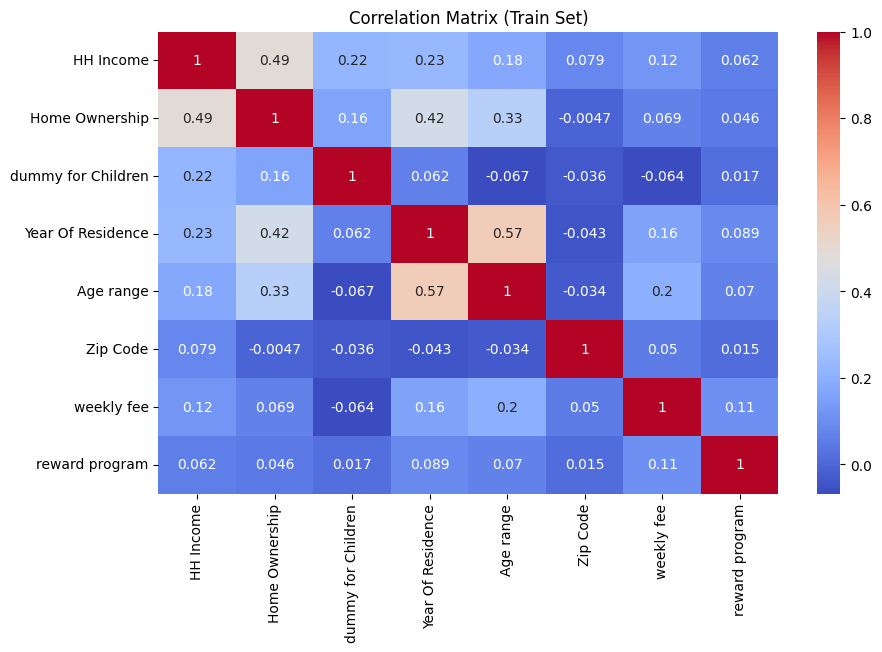

In [70]:
import pandas as pd

# Check shape of train set
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Check missing values (train only)
print(X_train.isnull().sum())

# Check distributions again (train only)
X_train['weekly fee'].hist()
plt.title('Weekly Fee Distribution (Train Set)')
plt.show()

# Check a few categorical distributions (train only)
print(X_train['Language'].value_counts())
print(X_train['HH Income'].value_counts())

# Optional: Correlation heatmap (train only)
plt.figure(figsize=(10,6))
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
sns.heatmap(X_train[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Train Set)")
plt.show()


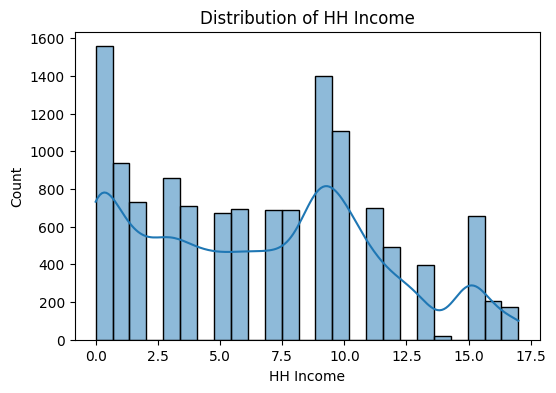

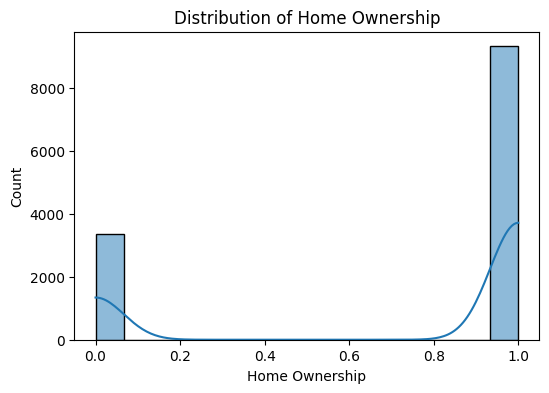

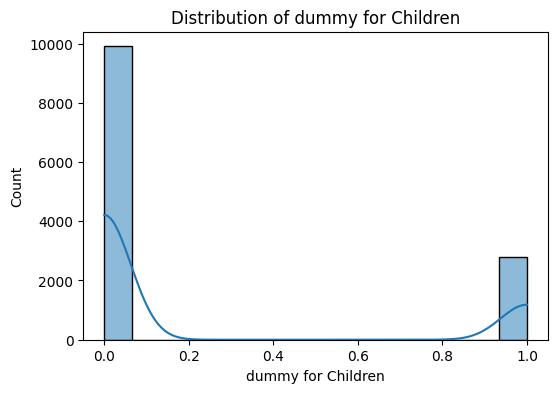

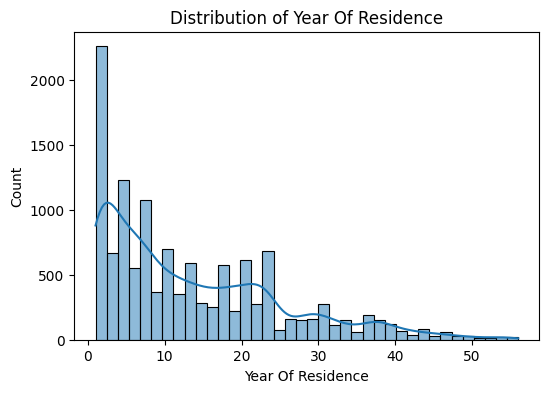

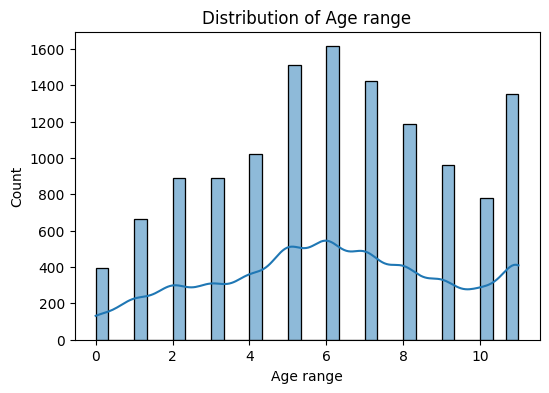

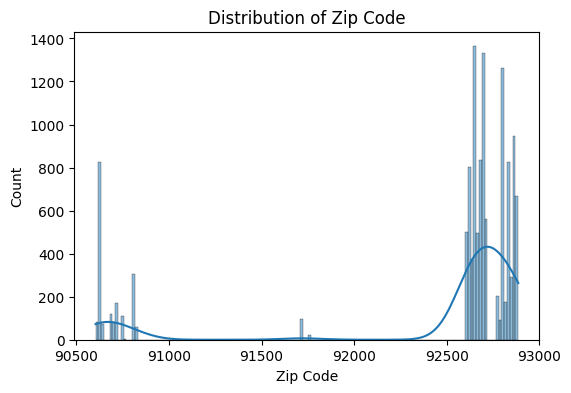

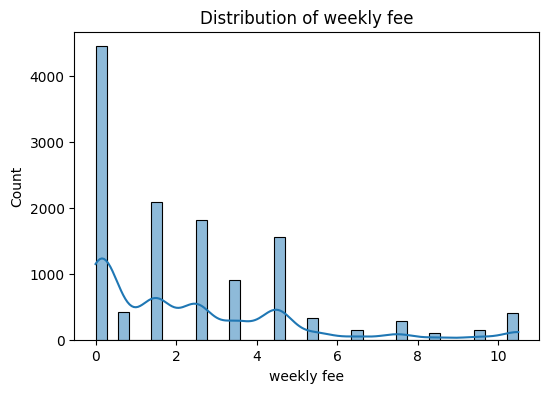

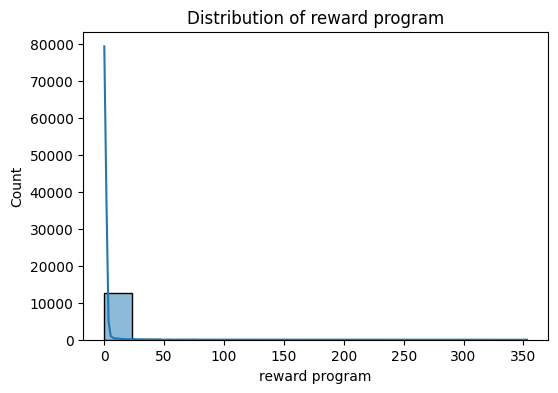

In [71]:
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


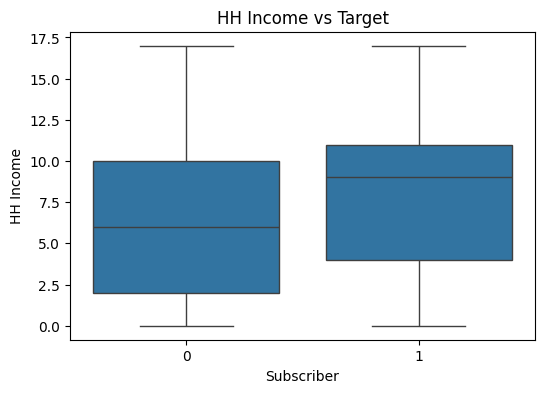

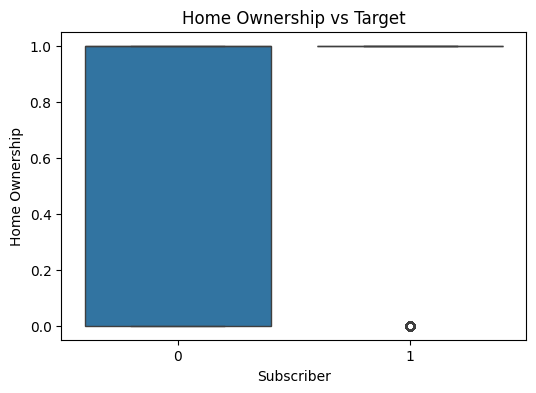

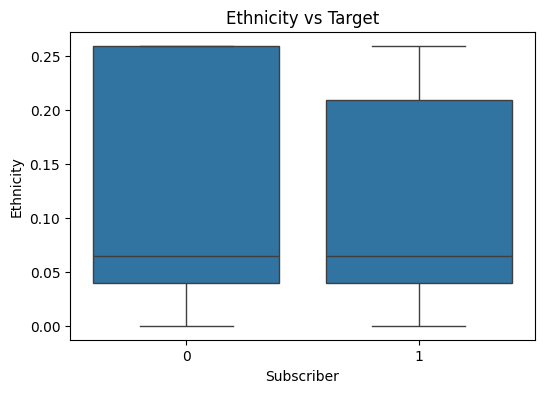

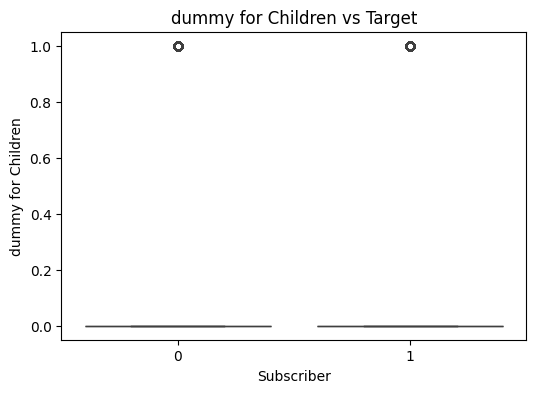

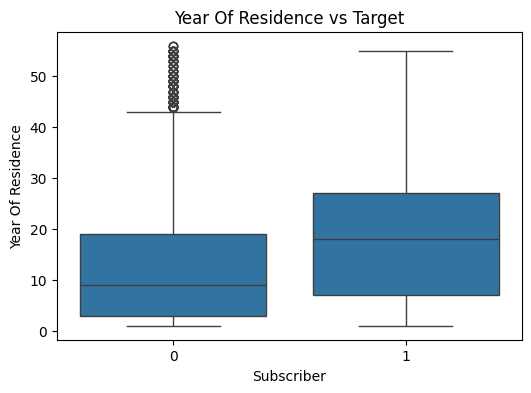

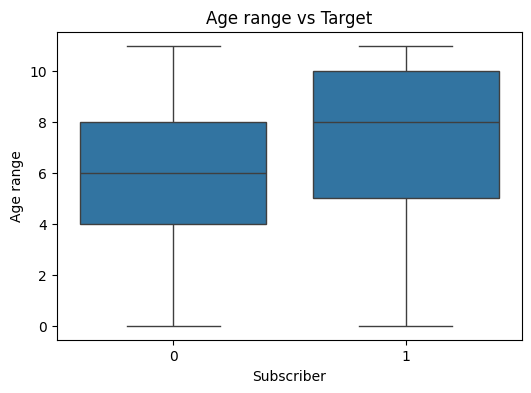

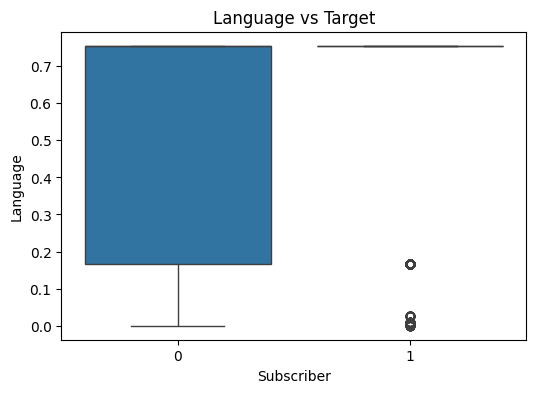

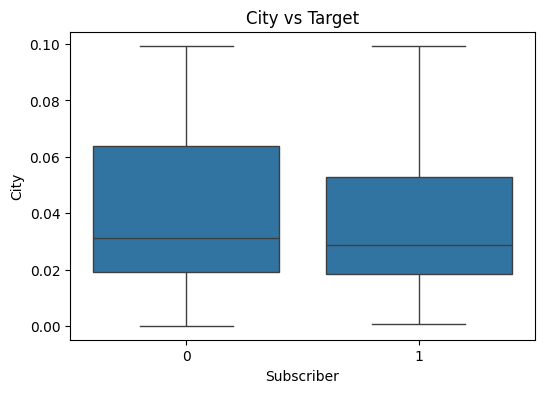

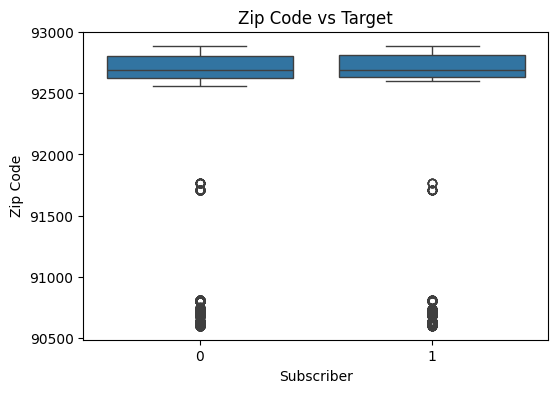

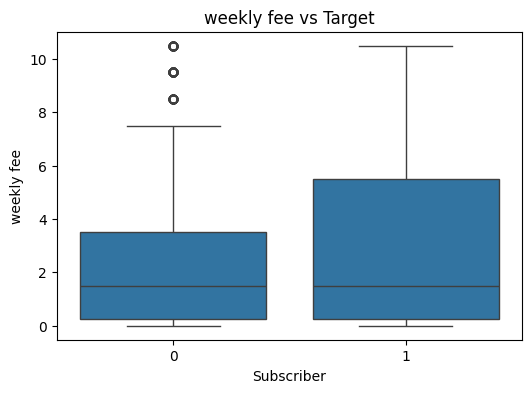

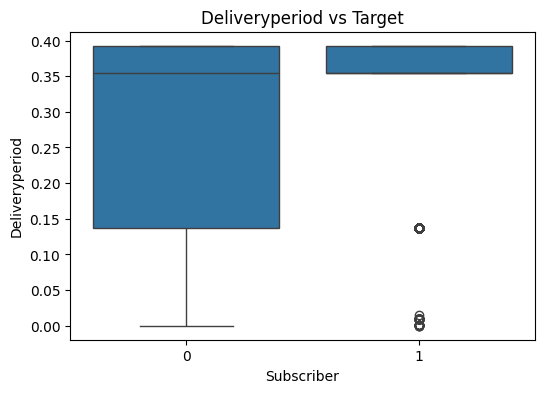

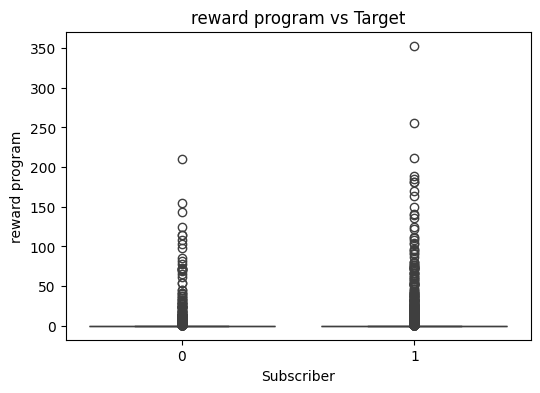

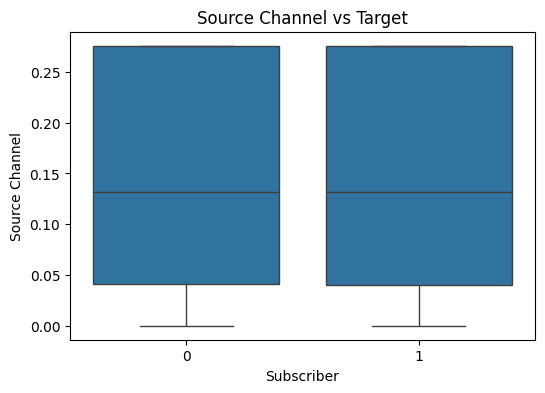

In [46]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"{col} vs Target")
    plt.show()


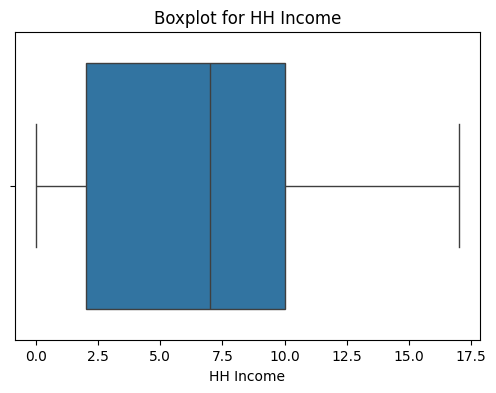

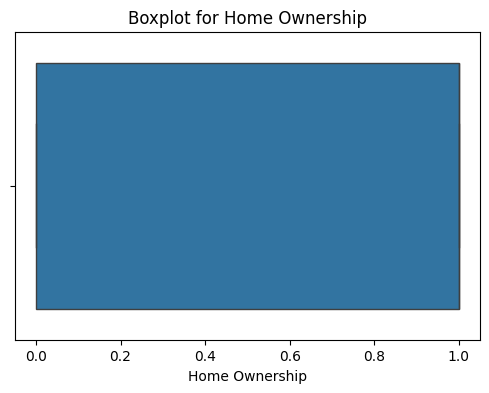

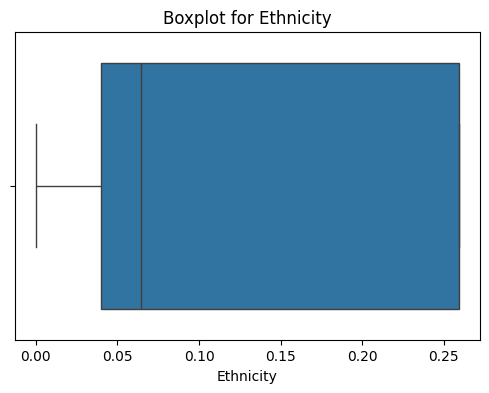

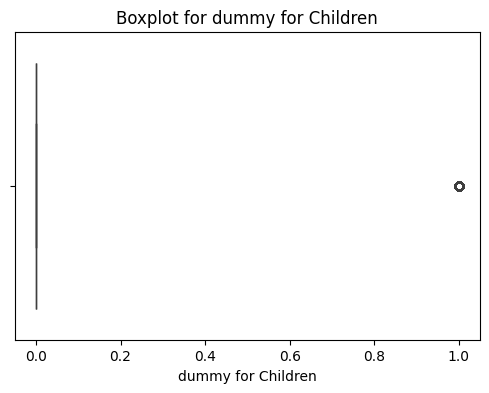

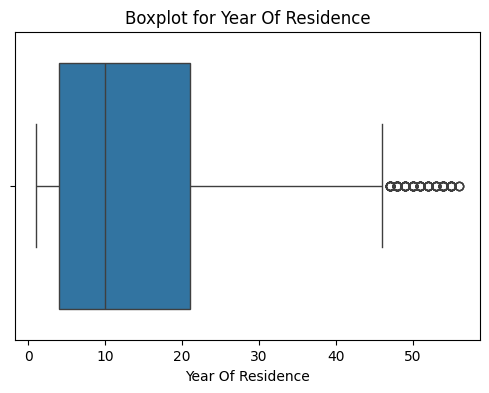

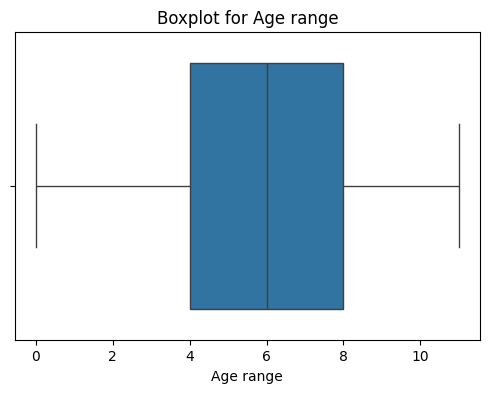

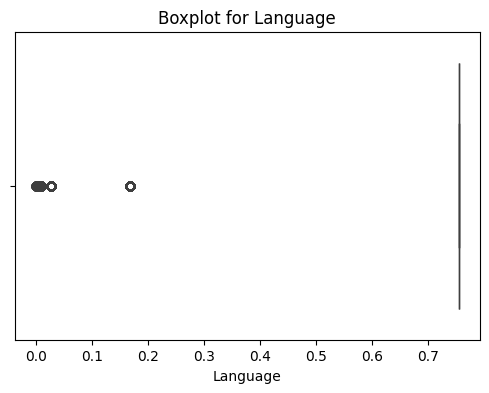

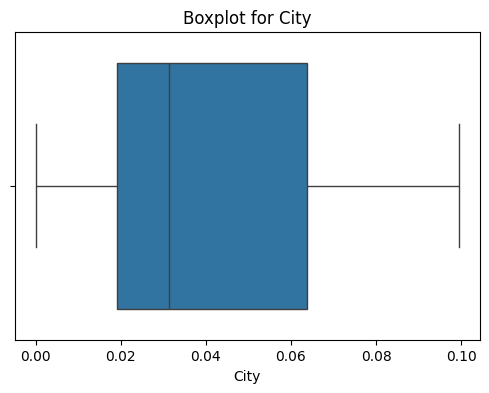

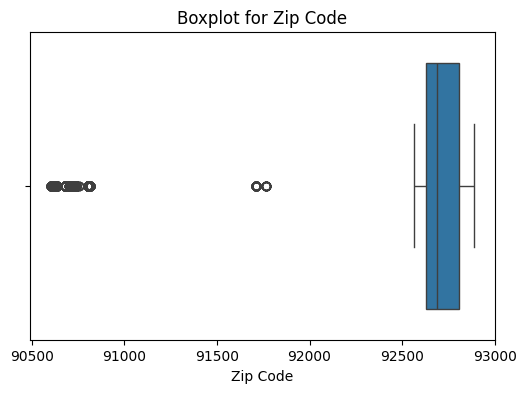

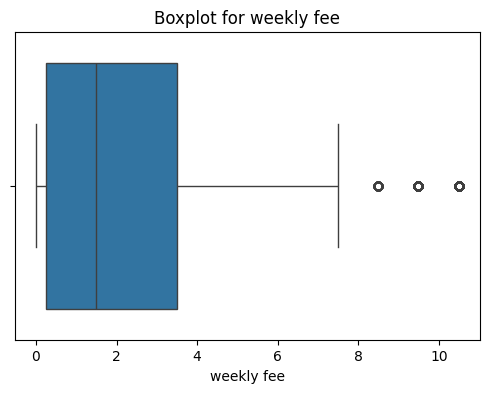

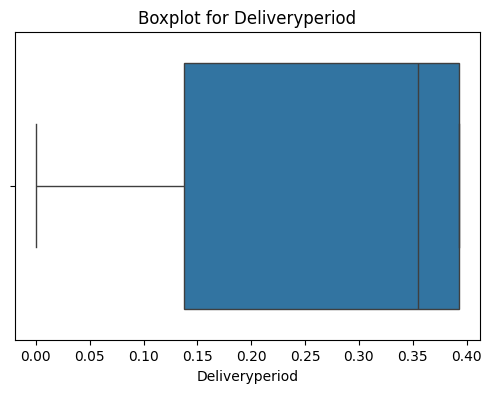

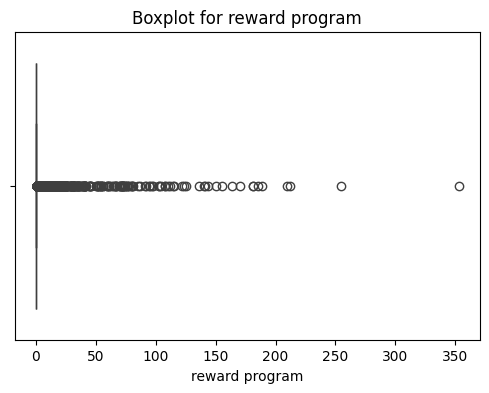

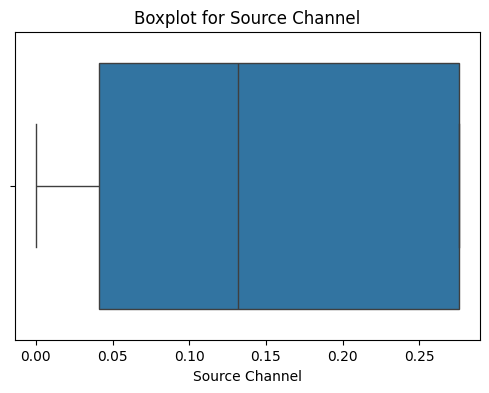

In [47]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=X_train[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


# Step 7: Feature Engineering #

**Actions:**

Created 'Tenure'

In [48]:
# Fill missing values with mode for categorical columns (since these are categorical)
for col in ['Ethnicity', 'Language', 'Source Channel']:
    mode_value = X_train[col].mode()[0]  # Always use train mode to avoid data leakage
    X_train[col] = X_train[col].fillna(mode_value)
    X_test[col] = X_test[col].fillna(mode_value)


In [49]:
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


Series([], dtype: int64)
Series([], dtype: int64)


In [50]:
X_train['Tenure'] = 2025 - X_train['Year Of Residence']
X_test['Tenure'] = 2025 - X_test['Year Of Residence']


In [51]:
print(X_train.dtypes)


HH Income                  int64
Home Ownership             int64
Ethnicity                float64
dummy for Children         int64
Year Of Residence          int64
Age range                  int64
Language                 float64
Address                   object
State                     object
City                     float64
Zip Code                   int64
weekly fee               float64
Deliveryperiod           float64
reward program             int64
Source Channel           float64
County_ORANGE               bool
County_RIVERSIDE            bool
County_SAN BERNARDINO       bool
Nielsen Prizm_FM            bool
Nielsen Prizm_FW            bool
Nielsen Prizm_ME            bool
Nielsen Prizm_MM            bool
Nielsen Prizm_MW            bool
Nielsen Prizm_YE            bool
Nielsen Prizm_YM            bool
Nielsen Prizm_YW            bool
Tenure                     int64
dtype: object


**Dropped irrelevant features (Address, State, Zip Code).**

In [52]:
X_train = X_train.drop(['Address', 'Zip Code'], axis=1)
X_test = X_test.drop(['Address', 'Zip Code'], axis=1)


In [53]:
X_train = X_train.drop(['State'], axis=1)
X_test = X_test.drop(['State'], axis=1)

In [54]:
print(X_train.dtypes)


HH Income                  int64
Home Ownership             int64
Ethnicity                float64
dummy for Children         int64
Year Of Residence          int64
Age range                  int64
Language                 float64
City                     float64
weekly fee               float64
Deliveryperiod           float64
reward program             int64
Source Channel           float64
County_ORANGE               bool
County_RIVERSIDE            bool
County_SAN BERNARDINO       bool
Nielsen Prizm_FM            bool
Nielsen Prizm_FW            bool
Nielsen Prizm_ME            bool
Nielsen Prizm_MM            bool
Nielsen Prizm_MW            bool
Nielsen Prizm_YE            bool
Nielsen Prizm_YM            bool
Nielsen Prizm_YW            bool
Tenure                     int64
dtype: object


# Step 8: Scaling

**Actions:**

Standardized numeric features (fit only on train, applied to test).

Standardization is important for algorithms like Logistic Regression.

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 9: Initial Logistic Regression #

**Actions:**

Trained a logistic regression.

Evaluated performance on train and test sets (imbalanced).

In [33]:
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Use higher max_iter to avoid convergence issues
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [34]:
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)


In [35]:
print("Train Set Performance")
print(classification_report(y_train, y_train_pred))
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")

print("\nTest Set Performance")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")


Train Set Performance
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     10254
           1       0.75      0.15      0.25      2430

    accuracy                           0.83     12684
   macro avg       0.79      0.57      0.57     12684
weighted avg       0.81      0.83      0.78     12684

Train Accuracy: 0.83

Test Set Performance
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2564
           1       0.75      0.16      0.27       607

    accuracy                           0.83      3171
   macro avg       0.79      0.57      0.58      3171
weighted avg       0.82      0.83      0.78      3171

Test Accuracy: 0.83


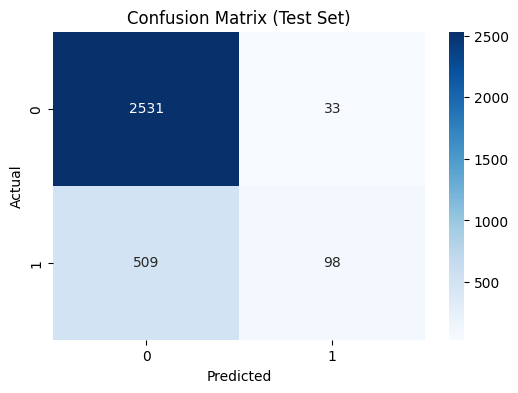

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Results showed poor recall for the minority class (YES), indicating imbalance issues.**

 # Step 10: Balanced Logistic Regression #


**Actions:**
  
Re-trained logistic regression using class_weight='balanced'.

Evaluated performance again. 

In [37]:
# Fit the balanced model
log_reg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_balanced.fit(X_train_scaled, y_train)

# Predict with the balanced model
y_train_pred_bal = log_reg_balanced.predict(X_train_scaled)
y_test_pred_bal = log_reg_balanced.predict(X_test_scaled)

# Classification report to check performance
print("Train Set Performance (Balanced):")
print(classification_report(y_train, y_train_pred_bal))

print("\nTest Set Performance (Balanced):")
print(classification_report(y_test, y_test_pred_bal))


Train Set Performance (Balanced):
              precision    recall  f1-score   support

           0       0.88      0.68      0.77     10254
           1       0.31      0.62      0.42      2430

    accuracy                           0.67     12684
   macro avg       0.60      0.65      0.59     12684
weighted avg       0.77      0.67      0.70     12684


Test Set Performance (Balanced):
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      2564
           1       0.31      0.62      0.41       607

    accuracy                           0.66      3171
   macro avg       0.59      0.64      0.58      3171
weighted avg       0.77      0.66      0.69      3171



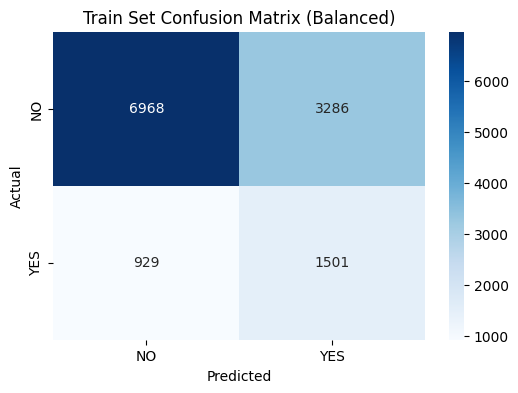

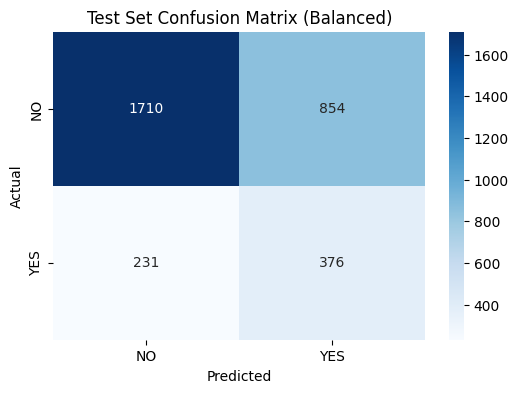

In [55]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["NO", "YES"], yticklabels=["NO", "YES"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


# Plot both
plot_confusion_matrix(y_train, y_train_pred_bal, "Train Set Confusion Matrix (Balanced)")
plot_confusion_matrix(y_test, y_test_pred_bal, "Test Set Confusion Matrix (Balanced)")


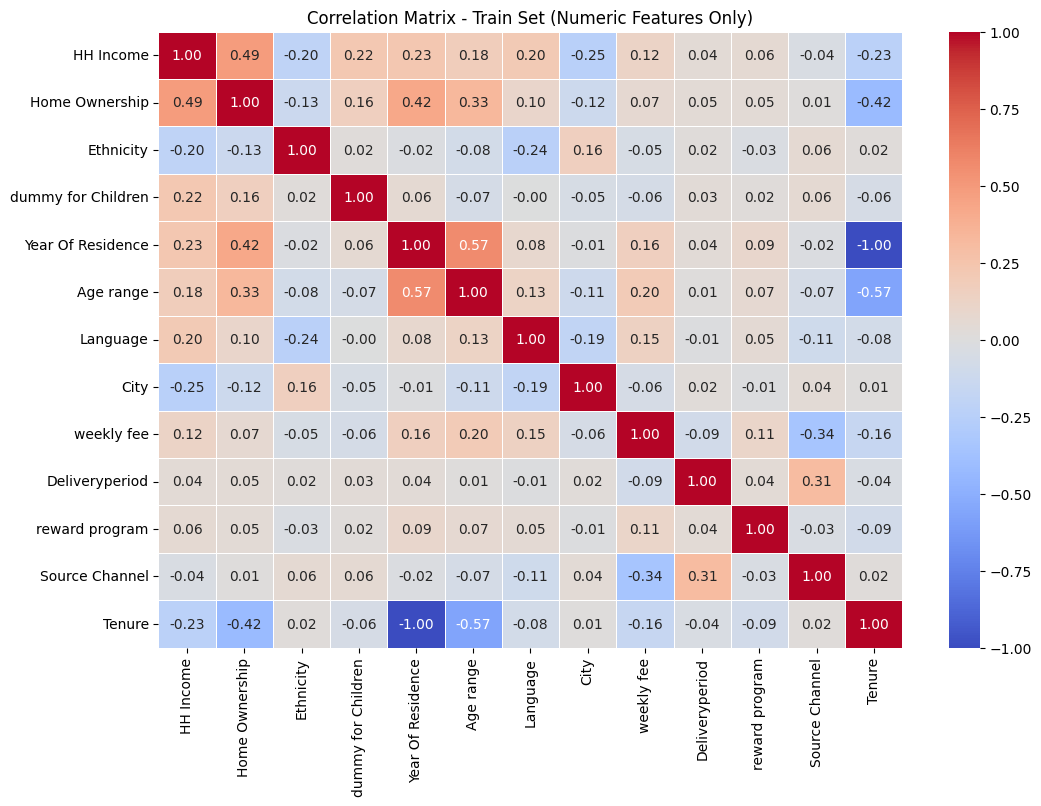

In [38]:
# Only keep numeric columns for correlation
numeric_cols = X_train.select_dtypes(include=[float, int]).columns

plt.figure(figsize=(12,8))
sns.heatmap(X_train[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Train Set (Numeric Features Only)")
plt.show()


In [64]:
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', random_state=42))
cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=5, scoring='f1')

print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.2f}")


Cross-Validation F1 Scores: [0.40389972 0.38789546 0.421843   0.42200557 0.42517483]
Mean F1 Score: 0.41


# Step 11: Feature Importance with Random Forest #

In [39]:
# Right after splitting, save columns
feature_names = X_train.columns.tolist()

# Do preprocessing (fill missing, encoding, etc.) — but make sure both X_train and X_test have the same columns
# Scale (now they become arrays)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Check shape vs. feature list length
print(f"Scaled train shape: {X_train_scaled.shape}")
print(f"Number of features: {len(feature_names)}")

# Create importance DataFrame
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
})



Scaled train shape: (12684, 24)
Number of features: 24


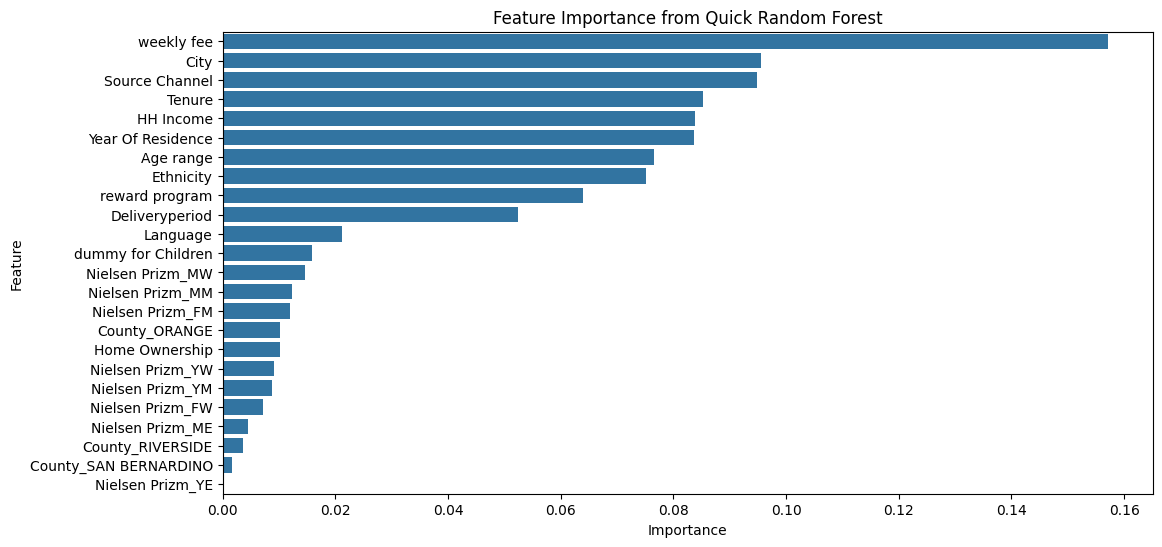

In [40]:
# Save columns BEFORE scaling
feature_names = X_train.columns

# Fit random forest on scaled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importance into a DataFrame
importances = pd.DataFrame({
    'Feature': feature_names,   # Use the saved names here
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot importance
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance from Quick Random Forest")
plt.show()


# Step 12: Hyperparameter Tuning (Random Forest) #

This whole section of code is building, tuning, and evaluating a Random Forest Classifier —
a model that works well for both classification and regression. You are using it to predict Subscription Status (YES/NO)

**Actions:**

Ran RandomizedSearchCV for Random Forest using a broad grid.


This part (first screenshot) is searching for the best hyperparameters for your Random Forest. It tries different combinations of:

n_estimators: Number of trees
max_depth: Tree depth
min_samples_split: Minimum samples needed to split
min_samples_leaf: Minimum samples needed per leaf
class_weight: Important for handling imbalanced data

The scoring='f1' focuses on improving F1 Score, which balances precision and recall, especially useful when dealing with class imbalance (YES cases are fewer than NO cases).

In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}


In [60]:
# 2. Setup RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,           # You can change this if you want faster/slower tuning
    cv=5,                 # 5-fold cross validation
    scoring='f1',         # Since imbalance is an issue, focus on F1 score
    n_jobs=-1,            # Use all cores
    random_state=42,
    verbose=2
)

# 3. Fit search using the **full feature set**
random_search.fit(X_train_scaled, y_train)

# 4. Show the best parameters
print("Best parameters found: ", random_search.best_params_)




Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; tot

Train Set Performance (Tuned):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     10254
           1       0.72      0.89      0.80      2430

    accuracy                           0.91     12684
   macro avg       0.85      0.90      0.87     12684
weighted avg       0.92      0.91      0.92     12684

Test Set Performance (Tuned):
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2564
           1       0.52      0.59      0.55       607

    accuracy                           0.82      3171
   macro avg       0.71      0.73      0.72      3171
weighted avg       0.83      0.82      0.82      3171

Train Accuracy (Tuned): 0.91
Test Accuracy (Tuned): 0.82


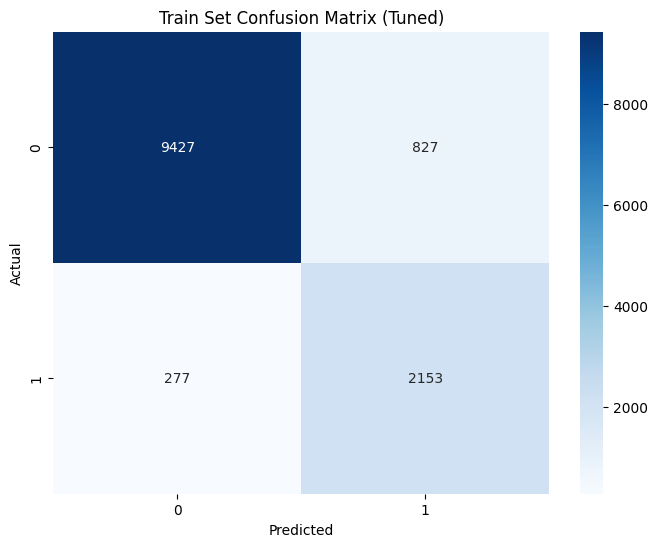

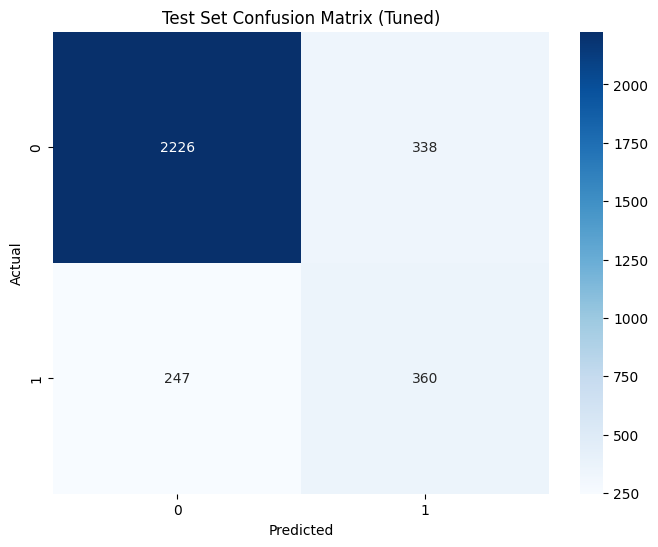

In [62]:
# 5. Evaluate the best estimator
best_rf = random_search.best_estimator_

y_train_pred_tuned = best_rf.predict(X_train_scaled)
y_test_pred_tuned = best_rf.predict(X_test_scaled)

# 6. Classification reports
print("Train Set Performance (Tuned):")
print(classification_report(y_train, y_train_pred_tuned))

print("Test Set Performance (Tuned):")
print(classification_report(y_test, y_test_pred_tuned))

# 7. Accuracy
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
print(f"Train Accuracy (Tuned): {train_accuracy_tuned:.2f}")
print(f"Test Accuracy (Tuned): {test_accuracy_tuned:.2f}")

# 8. Confusion matrices (optional)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred_tuned), annot=True, fmt='d', cmap='Blues')
plt.title("Train Set Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_tuned), annot=True, fmt='d', cmap='Blues')
plt.title("Test Set Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The model identifies NO cases well (high NO recall), but struggles with YES cases.

This confirms class imbalance is still a challenge, even after tuning.



# XGBoost #

In [50]:
%pip install xgboost

  Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl (223.6 MB)
Note: you may need to restart the kernel to use updated packages.


**Model Setup**

In [52]:
xgb_model = XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # Balancing
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)


Train Set Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     10254
           1       0.72      0.95      0.82      2430

    accuracy                           0.92     12684
   macro avg       0.85      0.93      0.88     12684
weighted avg       0.94      0.92      0.92     12684

Test Set Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2564
           1       0.48      0.67      0.56       607

    accuracy                           0.80      3171
   macro avg       0.70      0.75      0.71      3171
weighted avg       0.83      0.80      0.81      3171



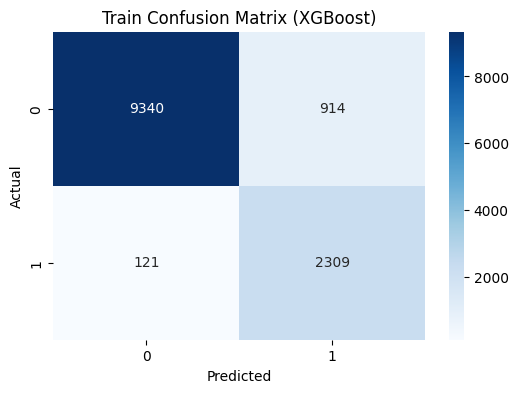

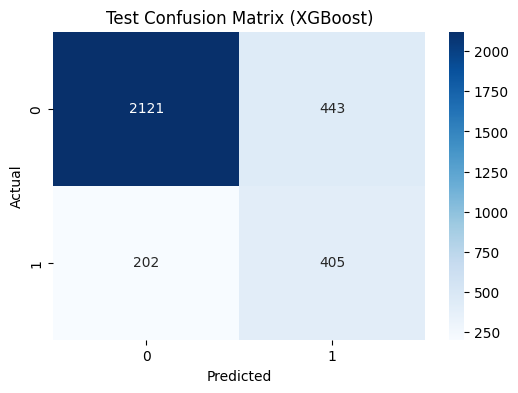

In [53]:
# Classification report
print("Train Set Performance (XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))

print("Test Set Performance (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))

# Confusion matrix

def plot_conf_matrix(y_true, y_pred, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_train, y_train_pred_xgb, "Train Confusion Matrix (XGBoost)")
plot_conf_matrix(y_test, y_test_pred_xgb, "Test Confusion Matrix (XGBoost)")


In [67]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [y_train.value_counts()[0] / y_train.value_counts()[1]],  # imbalance
}

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,            # You can increase if you want to be more exhaustive
    scoring='f1',          # Focus on F1 due to class imbalance
    cv=5,                   # 5-fold CV for reliability
    verbose=2,
    random_state=42,
    n_jobs=-1               # Use all available cores
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=4.219753086419753, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=4.219753086419753, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=4.219753086419753, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=4.219753086419753, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, scale_pos_weight=4.219753086419753, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=4.219753086419753, subsample=0.8; total time=   0.9s
[CV] END colsample_byt

Train Set Performance (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     10254
           1       0.66      0.89      0.76      2430

    accuracy                           0.89     12684
   macro avg       0.82      0.89      0.84     12684
weighted avg       0.91      0.89      0.90     12684

Test Set Performance (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2564
           1       0.50      0.70      0.58       607

    accuracy                           0.81      3171
   macro avg       0.71      0.77      0.73      3171
weighted avg       0.84      0.81      0.82      3171



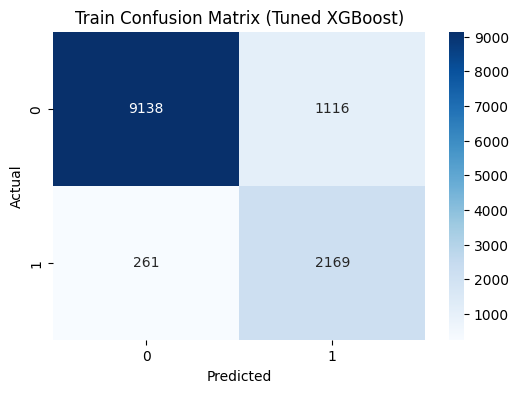

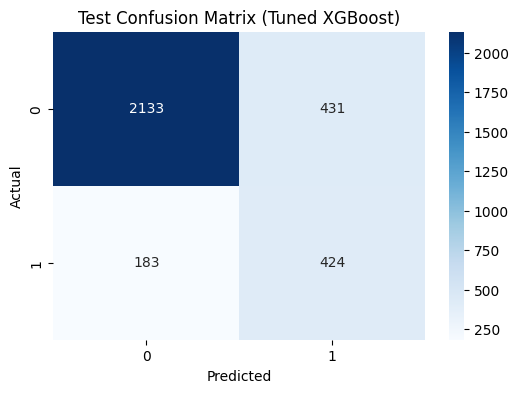

In [54]:
best_xgb = XGBClassifier(
    subsample=0.6,
    scale_pos_weight=4.2197,
    n_estimators=300,
    max_depth=10,
    learning_rate=0.01,
    colsample_bytree=0.8,
    random_state=42
)

best_xgb.fit(X_train_scaled, y_train)

y_train_pred_tuned = best_xgb.predict(X_train_scaled)
y_test_pred_tuned = best_xgb.predict(X_test_scaled)

print("Train Set Performance (Tuned XGBoost):")
print(classification_report(y_train, y_train_pred_tuned))

print("Test Set Performance (Tuned XGBoost):")
print(classification_report(y_test, y_test_pred_tuned))

# Optional: Plot Confusion Matrix

def plot_conf_matrix(y_true, y_pred, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_train, y_train_pred_tuned, "Train Confusion Matrix (Tuned XGBoost)")
plot_conf_matrix(y_test, y_test_pred_tuned, "Test Confusion Matrix (Tuned XGBoost)")


In [55]:
y_train_prob = xgb_model.predict_proba(X_train_scaled)[:, 1]  # Probability for class 1 (churn)
y_test_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]    # Same for test set


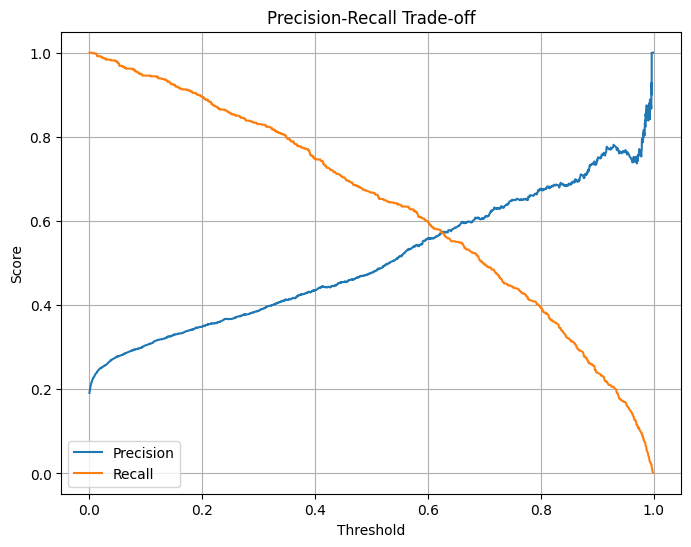

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Trade-off")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for max F1: {best_threshold:.2f}")


Best threshold for max F1: 0.57


In [58]:
y_train_pred_thresh = (y_train_prob >= best_threshold).astype(int)
y_test_pred_thresh = (y_test_prob >= best_threshold).astype(int)

print("Train Set Performance (Optimized Threshold):")
print(classification_report(y_train, y_train_pred_thresh))

print("Test Set Performance (Optimized Threshold):")
print(classification_report(y_test, y_test_pred_thresh))


Train Set Performance (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10254
           1       0.79      0.90      0.84      2430

    accuracy                           0.93     12684
   macro avg       0.88      0.92      0.90     12684
weighted avg       0.94      0.93      0.94     12684

Test Set Performance (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2564
           1       0.54      0.63      0.58       607

    accuracy                           0.83      3171
   macro avg       0.72      0.75      0.74      3171
weighted avg       0.84      0.83      0.83      3171



# Neural Network # 

Reminder: Neural Networks need numeric input.


In [59]:
!pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached grpcio-1.70.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metada

In [60]:
# Define the model
model = Sequential()

# Input layer (number of neurons = number of features)
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout to avoid overfitting
model.add(Dense(16, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


2025-03-06 20:53:29.511802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741294409.536011     113 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741294409.542274     113 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 20:53:29.565430: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/

# Train the Model ' 

In [77]:
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)


Epoch 1/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8097 - loss: 0.4863 - val_accuracy: 0.8370 - val_loss: 0.4357
Epoch 2/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8293 - loss: 0.4375 - val_accuracy: 0.8354 - val_loss: 0.4272
Epoch 3/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8355 - loss: 0.4208 - val_accuracy: 0.8329 - val_loss: 0.4218
Epoch 4/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8338 - loss: 0.4166 - val_accuracy: 0.8335 - val_loss: 0.4169
Epoch 5/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8295 - loss: 0.4127 - val_accuracy: 0.8344 - val_loss: 0.4183
Epoch 6/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8375 - loss: 0.3952 - val_accuracy: 0.8322 - val_loss: 0.4138
Epoch 7/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8324 - loss: 0.4037 - val_accuracy: 0.8332 - val_loss: 0.4166
Epoch 8/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8316 - loss: 0.4007 - val_accuracy: 0.

# Evaluate the Performance #

397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Train Set Performance (Neural Network):
              precision    recall  f1-score   support

           0       0.83      0.16      0.27     10254
           1       0.19      0.86      0.32      2430

    accuracy                           0.29     12684
   macro avg       0.51      0.51      0.29     12684
weighted avg       0.71      0.29      0.28     12684

Test Set Performance (Neural Network):
              precision    recall  f1-score   support

           0       0.83      0.15      0.26      2564
           1       0.19      0.86      0.32       607

    accuracy                           0.29      3171
   macro avg       0.51      0.51      0.29      3171
weighted avg       0.71      0.29      0.27      3171



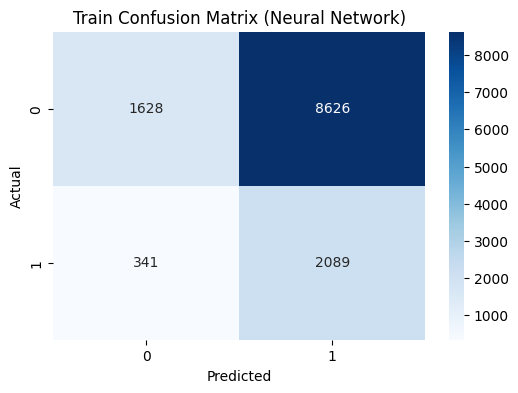

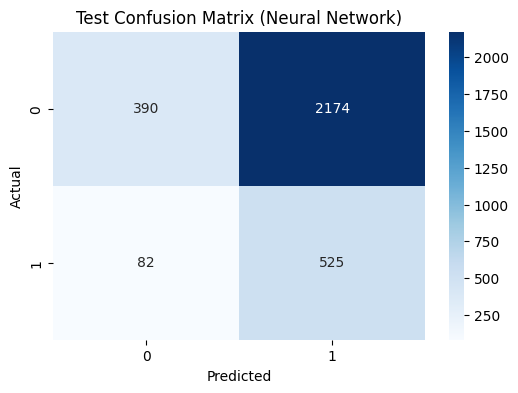

In [62]:
y_train_pred_nn = (model.predict(X_train_scaled) > 0.5).astype(int)
y_test_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Train Set Performance (Neural Network):")
print(classification_report(y_train, y_train_pred_nn))

print("Test Set Performance (Neural Network):")
print(classification_report(y_test, y_test_pred_nn))

# Optional Confusion Matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_train, y_train_pred_nn, "Train Confusion Matrix (Neural Network)")
plot_confusion_matrix(y_test, y_test_pred_nn, "Test Confusion Matrix (Neural Network)")


Epoch 1/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5404 - loss: 1.3196 - val_accuracy: 0.7152 - val_loss: 0.6202 - learning_rate: 0.0010
Epoch 2/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6379 - loss: 1.0673 - val_accuracy: 0.7392 - val_loss: 0.5829 - learning_rate: 0.0010
Epoch 3/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6669 - loss: 1.0263 - val_accuracy: 0.7449 - val_loss: 0.5859 - learning_rate: 0.0010
Epoch 4/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6913 - loss: 0.9920 - val_accuracy: 0.7401 - val_loss: 0.5727 - learning_rate: 0.0010
Epoch 5/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7025 - loss: 0.9741 - val_accuracy: 0.7184 - val_loss: 0.5797 - learning_rate: 0.0010
Epoch 6/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7065 - loss: 0.9541 - val_accuracy: 0.7058 - val_loss: 0.5689 - learning_rate: 0.0010
Epoch 7/100
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6970 - loss: 0

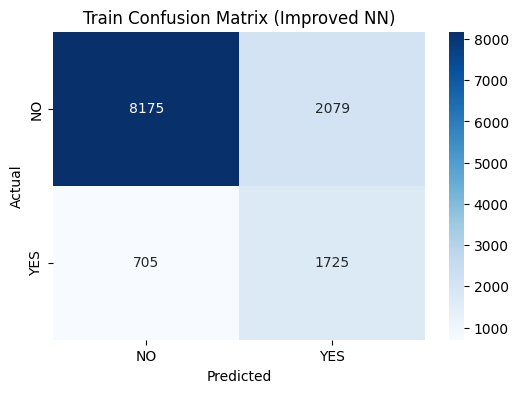

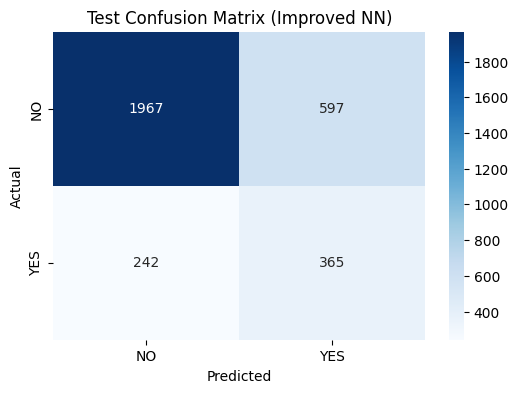

In [63]:
# Step 1 - Model Architecture
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# Step 2 - Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 3 - Callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(patience=5)
]

# Step 4 - Fit Model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    epochs=100,
    class_weight={0:1, 1:4},  # Adjust to your imbalance ratio
    callbacks=callbacks,
    verbose=1
)

# Step 5 - Evaluate Model
y_train_pred_nn = (model.predict(X_train_scaled) >= 0.5).astype(int)
y_test_pred_nn = (model.predict(X_test_scaled) >= 0.5).astype(int)

print("Train Set Performance (Improved Neural Network):")
print(classification_report(y_train, y_train_pred_nn))

print("Test Set Performance (Improved Neural Network):")
print(classification_report(y_test, y_test_pred_nn))

# Step 6 - Plot Confusion Matrices
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_train, y_train_pred_nn, "Train Confusion Matrix (Improved NN)")
plot_conf_matrix(y_test, y_test_pred_nn, "Test Confusion Matrix (Improved NN)")


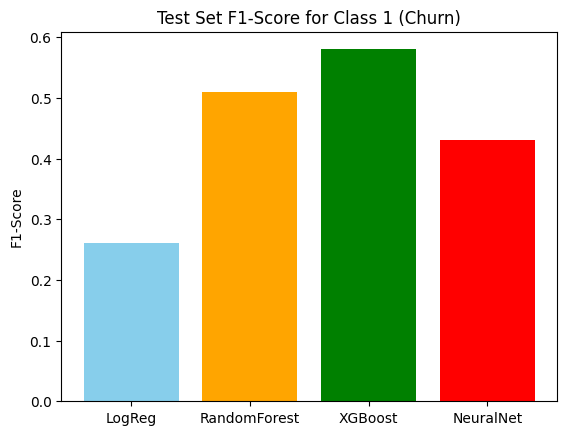

In [65]:
models = ['LogReg', 'RandomForest', 'XGBoost', 'NeuralNet']
f1_scores = [0.26, 0.51, 0.58, 0.43]  # replace with real scores

plt.bar(models, f1_scores, color=['skyblue', 'orange', 'green', 'red'])
plt.title("Test Set F1-Score for Class 1 (Churn)")
plt.ylabel("F1-Score")
plt.show()


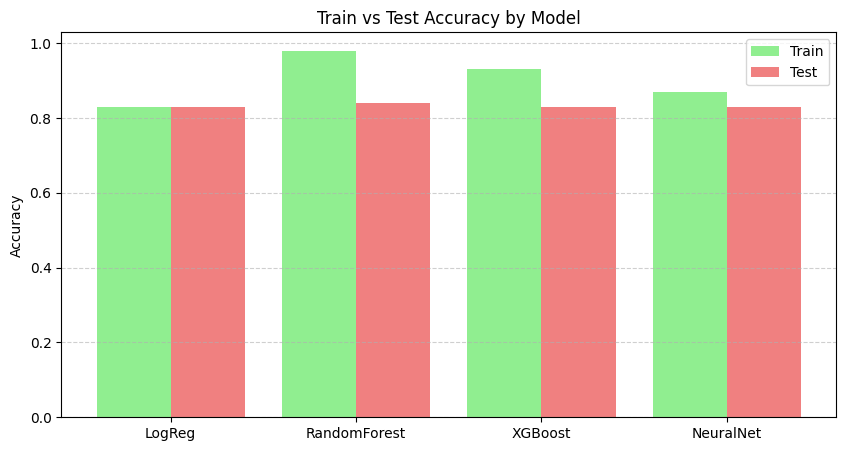

In [66]:
train_acc = [0.83, 0.98, 0.93, 0.87]  # Replace with your actual results
test_acc = [0.83, 0.84, 0.83, 0.83]   # Replace with actual results

x = range(len(models))

plt.figure(figsize=(10,5))
plt.bar(x, train_acc, width=0.4, label='Train', color='lightgreen')
plt.bar([p + 0.4 for p in x], test_acc, width=0.4, label='Test', color='lightcoral')
plt.xticks([p + 0.2 for p in x], models)

plt.title("Train vs Test Accuracy by Model")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
